In [26]:
import pandas as pd
import numpy as np
from sklearnex import patch_sklearn, unpatch_sklearn
patch_sklearn()


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [27]:
df1 = pd.read_csv('student-por.csv', sep=';')
df1

# bool type

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


<Axes: ylabel='Frequency'>

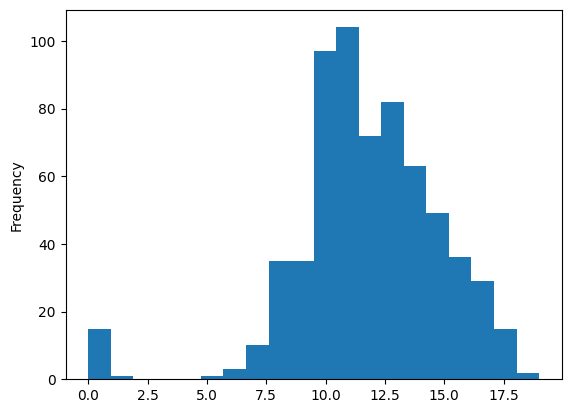

In [28]:
df1['G3'].plot(kind='hist', bins=20)

In [29]:
df1.columns.tolist()
booldict = {'yes': 1, 'no': 0}
originalname = [
'school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3'
]
dtype = [
 'category',
 'category',
 np.uint32,
 'category',
 'category',
 
 'category',
 'category',
 'category',
 'category',
 'category',
 
 'category',
 'category',
 'category',
 'category',
 np.uint8,
 
 'category',
 'category',
 'category',
 'category',
 'category',
 
 'category',
 'category',
 'category',
 'category',
 'category',
 
 'category',
 'category',
 'category',
 'category',
 np.uint16,
 
 np.uint8,
 np.uint8,
 np.uint8,
]
bins = [-np.inf, 13, np.inf]

df1 = df1.astype(dict(zip(originalname, dtype)))
df1[df1.columns[15:23]] = df1[df1.columns[15:23]].apply(
 lambda x : x.map(booldict)
)

df1[df1.columns[15:23]] = df1[df1.columns[15:23]].astype('bool') 
# df1['failures'] = df1['failures'].astype('bool')
df1['G3_Cat'] = pd.cut(df1['G3'], bins=bins, labels=list(range(len(bins)-1)))
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      649 non-null    category
 1   sex         649 non-null    category
 2   age         649 non-null    uint32  
 3   address     649 non-null    category
 4   famsize     649 non-null    category
 5   Pstatus     649 non-null    category
 6   Medu        649 non-null    category
 7   Fedu        649 non-null    category
 8   Mjob        649 non-null    category
 9   Fjob        649 non-null    category
 10  reason      649 non-null    category
 11  guardian    649 non-null    category
 12  traveltime  649 non-null    category
 13  studytime   649 non-null    category
 14  failures    649 non-null    uint8   
 15  schoolsup   649 non-null    bool    
 16  famsup      649 non-null    bool    
 17  paid        649 non-null    bool    
 18  activities  649 non-null    bool    
 19  nursery 

In [30]:
# if dtype of df col is category change it to code
df1_backup = df1.copy(deep=True)
for col in df1.columns:
    if df1[col].dtype == 'category':
        df1[col] = df1[col].cat.codes.astype('category')

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      649 non-null    category
 1   sex         649 non-null    category
 2   age         649 non-null    uint32  
 3   address     649 non-null    category
 4   famsize     649 non-null    category
 5   Pstatus     649 non-null    category
 6   Medu        649 non-null    category
 7   Fedu        649 non-null    category
 8   Mjob        649 non-null    category
 9   Fjob        649 non-null    category
 10  reason      649 non-null    category
 11  guardian    649 non-null    category
 12  traveltime  649 non-null    category
 13  studytime   649 non-null    category
 14  failures    649 non-null    uint8   
 15  schoolsup   649 non-null    bool    
 16  famsup      649 non-null    bool    
 17  paid        649 non-null    bool    
 18  activities  649 non-null    bool    
 19  nursery 

<Axes: >

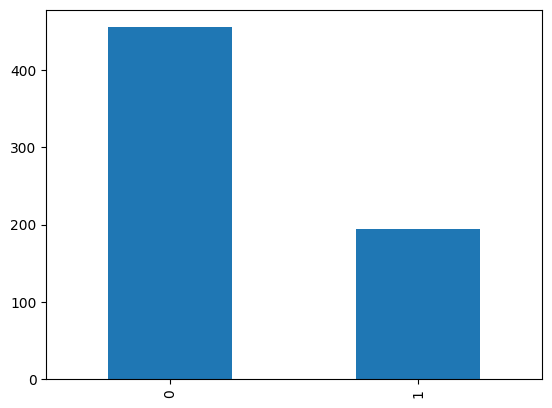

In [32]:
df1['G3_Cat'].value_counts().plot(kind='bar')

In [43]:
df1.corr(numeric_only=False)['G3'].abs().sort_values(ascending=False)

G3            1.000000
G2            0.918548
G1            0.826387
G3_Cat        0.713415
failures      0.393316
higher        0.332172
school        0.284294
studytime     0.249789
Medu          0.240151
Fedu          0.211800
Dalc          0.204719
Walc          0.176619
address       0.167637
internet      0.150025
Mjob          0.148252
sex           0.129077
traveltime    0.127173
reason        0.124969
freetime      0.122705
age           0.106505
health        0.098851
absences      0.091379
romantic      0.090583
goout         0.087641
guardian      0.079609
schoolsup     0.066405
famrel        0.063361
activities    0.059791
famsup        0.059206
paid          0.054898
Fjob          0.052953
famsize       0.045016
nursery       0.028752
Pstatus       0.000754
Name: G3, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from itertools import combinations

searchList = df1.corr(numeric_only=False)['G3'].abs().sort_values(ascending=False).index[4:18].tolist()
resultDict = {}
resultList = []
rowList = []
filterList = ['school', 'reason', 'higher',]
y = df1['G3_Cat']

# for filter in filterList:
#     searchList.remove(filter)

for x in range(1,len(searchList)):
    for row in combinations(searchList, x):
        rowList.append(list(row))
len(rowList)

16382

In [56]:
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
def traindata(row, resultList:list, Final=False, model = LogisticRegression):
    X = df1[row]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # knn = clone(model)
    knn = model(n_jobs=-1)
    knn.fit(X_train, y_train)
    result = knn.score(X_test, y_test)
    resultList.append([row, str(model).split('.')[-1], result])
    if Final:
        print(f'{row} : {result}')
        print(classification_report(y_test, knn.predict(X_test)))
        print(confusion_matrix(y_test, knn.predict(X_test)))
        print(f'AUC: {roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]):.3f}')
        print(f'ROC: {roc_curve(y_test, knn.predict_proba(X_test)[:, 1])}')
        

model = [
    # SVC,
    # NuSVC,
    # RidgeClassifier,
    # LogisticRegression,
    KNeighborsClassifier,
]
    


In [47]:

# ]
resultList.clear()
for modelname in model:
    for row in rowList:
        traindata(row, resultList, False, modelname)



In [57]:
filterList = ['school', 'reason', 'higher']
totalList = df1.columns.tolist()[:-4]

traindata(filterList, resultList, True)
# using Logistic Regression
# [['school', 'reason', 'paid', 'higher'], 0.6461538461538462],
# [['school', 'reason', 'paid', 'higher'], 0.6461538461538462],
# [[['school', 'Fjob', 'reason', 'paid', 'higher'], 0.6230769230769231],
#  [['school', 'reason', 'paid', 'nursery', 'higher'], 0.6153846153846154],

# using SVC
# [[['school', 'reason', 'nursery', 'higher'], 0.6153846153846154],
#  [['school', 'famsize', 'higher'], 0.6076923076923076],
#  [['school', 'famsize', 'higher'], 0.6076923076923076],

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.

In [51]:
len(resultList)

16385

In [53]:
[x for x in sorted(resultList, key=lambda x: x[-1], reverse=True)]

[[['failures', 'higher', 'Dalc', 'address', 'Mjob'],
  "KNeighborsClassifier'>",
  0.7307692307692307],
 [['school', 'studytime', 'Medu', 'Walc', 'sex', 'traveltime'],
  "KNeighborsClassifier'>",
  0.7307692307692307],
 [['failures', 'Dalc', 'address', 'Mjob'],
  "KNeighborsClassifier'>",
  0.7230769230769231],
 [['failures', 'Dalc', 'Mjob', 'sex'],
  "KNeighborsClassifier'>",
  0.7230769230769231],
 [['Medu', 'Dalc', 'internet', 'traveltime'],
  "KNeighborsClassifier'>",
  0.7230769230769231],
 [['Fedu', 'Walc', 'Mjob', 'sex'],
  "KNeighborsClassifier'>",
  0.7230769230769231],
 [['failures', 'higher', 'Dalc', 'Mjob', 'sex'],
  "KNeighborsClassifier'>",
  0.7230769230769231],
 [['Medu', 'Fedu', 'Walc', 'address', 'internet'],
  "KNeighborsClassifier'>",
  0.7230769230769231],
 [['failures', 'higher', 'Dalc', 'address', 'Mjob', 'sex'],
  "KNeighborsClassifier'>",
  0.7230769230769231],
 [['failures',
   'school',
   'studytime',
   'Fedu',
   'Dalc',
   'Walc',
   'address',
   'reason

## 실험 결과
- itertools의 combinations 를 사용하여 분류대상을 손쉽게 추출
- 다만 전체 데이터를 기준으로 하기에는 시간이 걸리기 때문에 먼저 모든 피쳐의 대략의  
연관성을 분석 후 10~15개? 이하의 데이터를 선택

- ['higher', 'school', 'Mjob', 'reason'], 0.854 (G3을 2가지(10점 기준)로 분류할 경우 KNN Classifier)
- <strong> ['school', 'reason', 'higher'] </strong> : 0.646(G3 마지막 점수를 5가지로 분류할 경우, Logistic Regression)
- 어머니의 직장 종류에 영향을 받음(Mjob), 특히 선생이나 가정주부요소가 중요함
- 좋은 학교에 다니는 것이 중요하다(school)
- 점수는 결국 본인 의지에 달려 있다 하지만 그 이유가 중요함(reason)
- 그 이유는 더 좋은 학교에 가고자 하는 것임(higher)


In [55]:
from pycaret.classification import *

s = setup(
    data = df1[
        # df1.columns.tolist()[:-4]
        # ['failures', 'school', 'higher']
        # filterList + ['Mjob']
        ['failures', 'higher', 'Dalc', 'address', 'Mjob']
        + ['G3_Cat']
        ], 
    target = 'G3_Cat',
    normalize=True,
    session_id=42,
    )
top10 = s.compare_models(n_select=10)

,Description,Value
0,Session id,42
1,Target,G3_Cat
2,Target type,Binary
3,Original data shape,"(649, 6)"
4,Transformed data shape,"(649, 14)"
5,Transformed train set shape,"(454, 14)"
6,Transformed test set shape,"(195, 14)"
7,Numeric features,1
8,Categorical features,3
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7093,0.0000,0.2500,0.5289,0.3290,0.1791,0.2010,0.0200
dt,Decision Tree Classifier,0.7071,0.0000,0.2500,0.5235,0.3277,0.1753,0.1966,0.0140
catboost,CatBoost Classifier,0.7071,0.0000,0.2423,0.5204,0.3205,0.1707,0.1921,0.3080
xgboost,Extreme Gradient Boosting,0.7049,0.0000,0.2500,0.5158,0.3268,0.1712,0.1913,0.0240
gbc,Gradient Boosting Classifier,0.7027,0.0000,0.2346,0.4958,0.3069,0.1566,0.1745,0.0240
dummy,Dummy Classifier,0.7005,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0140
rf,Random Forest Classifier,0.7004,0.0000,0.2857,0.5107,0.3471,0.1802,0.1989,0.0170
lightgbm,Light Gradient Boosting Machine,0.6983,0.0000,0.2632,0.4916,0.3237,0.1638,0.1796,0.0550
lr,Logistic Regression,0.6938,0.0000,0.1819,0.4133,0.2461,0.1078,0.1159,0.3170
lda,Linear Discriminant Analysis,0.6938,0.0000,0.1819,0.4133,0.2461,0.1078,0.1159,0.0150


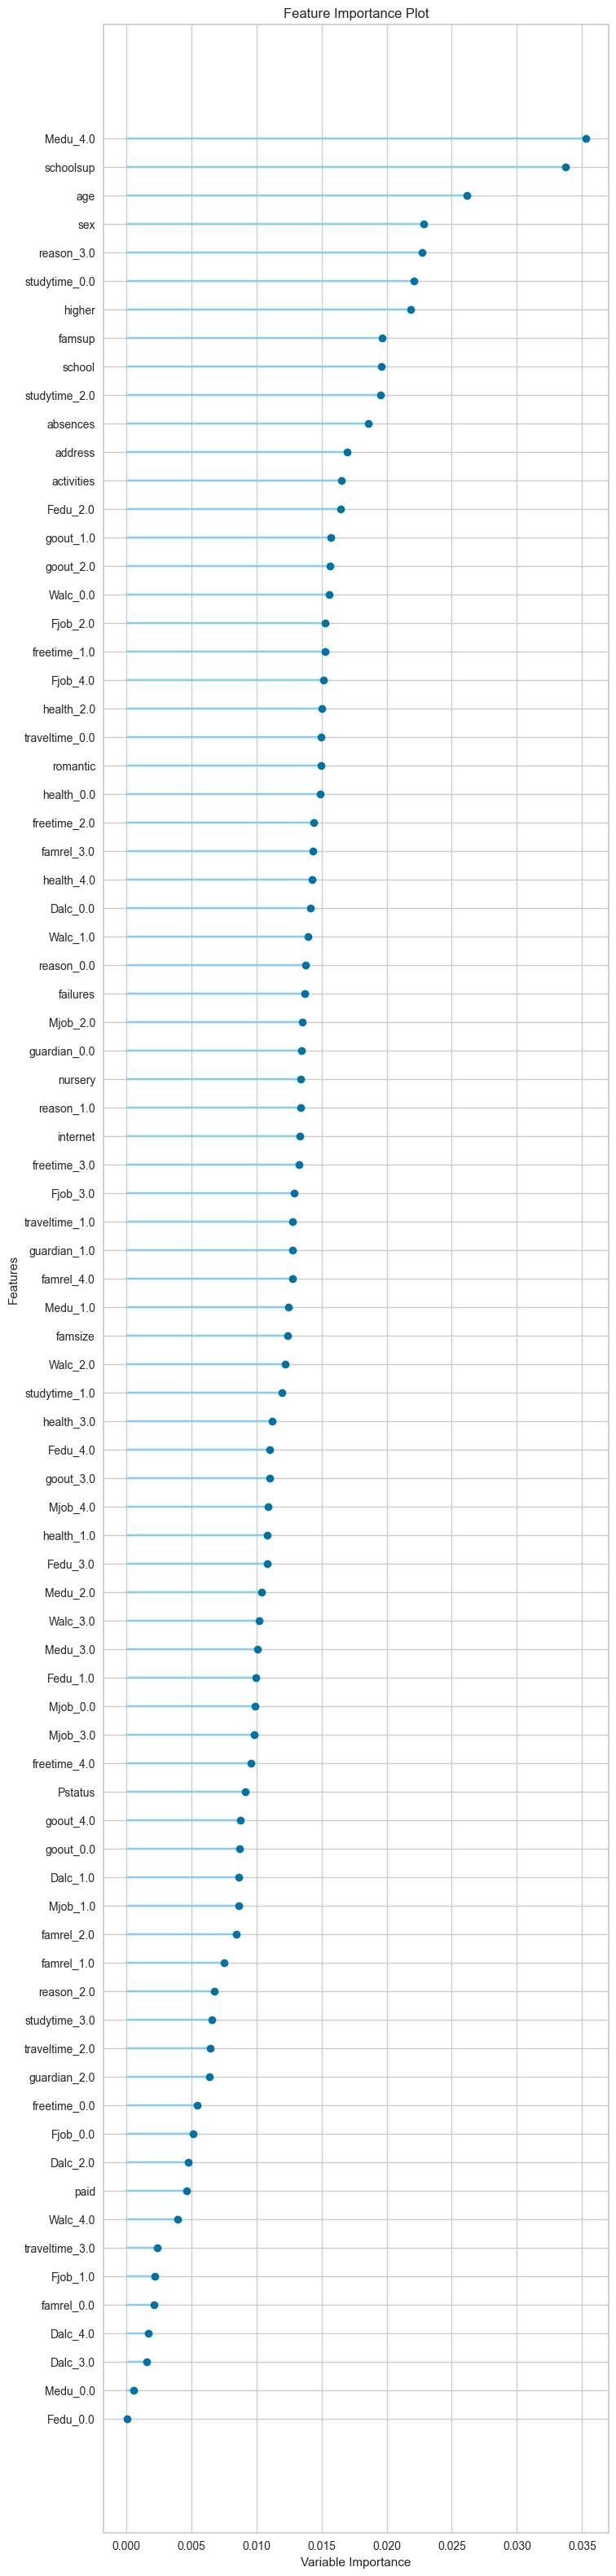

In [41]:
plot_model(top10[0], plot='feature_all')


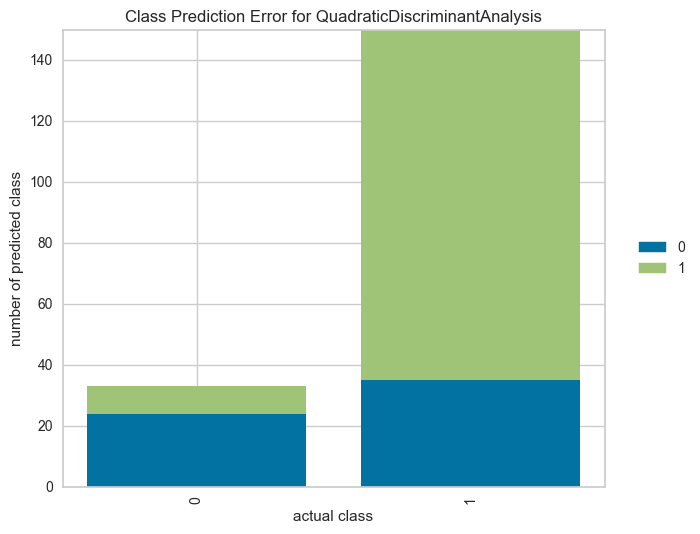

In [35]:
plot_model(top10[1], plot='error')

In [29]:

df1['Mjob'], df1_backup['Mjob']

(0      0
 1      0
 2      0
 3      1
 4      2
       ..
 644    3
 645    4
 646    2
 647    3
 648    3
 Name: Mjob, Length: 649, dtype: category
 Categories (5, int64): [0, 1, 2, 3, 4],
 0       at_home
 1       at_home
 2       at_home
 3        health
 4         other
          ...   
 644    services
 645     teacher
 646       other
 647    services
 648    services
 Name: Mjob, Length: 649, dtype: category
 Categories (5, object): ['at_home', 'health', 'other', 'services', 'teacher'])

In [44]:
evaluate_model(top10[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…